## Quiz #0307

### "EDA and ANOVA for guinea pig tooth growth"

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
%matplotlib inline

#### Answer the following questions by providing Python code:

We will use the dataset "data_ToothGrowth.csv". 
- len = teeth length. 
- supp = supplementary type with two possible values: VC (vitamin C) or OJ (orange juice). 
- dose (mgr/day) = dosage per day with three possible values: 0.5, 1.0, 2.0.

In [2]:
# Go to the directory where the data file is located. 
os.chdir(r'C:\Users\hassan\OneDrive\Documents\les_csv')                # Please, replace the path with your own.  

In [3]:
df = pd.read_csv('data_ToothGrowth.csv', header='infer')

In [20]:
df.tail()

,len,supp,dose
55,30.9,OJ,2.0
56,26.4,OJ,2.0
57,27.3,OJ,2.0
58,29.4,OJ,2.0
59,23.0,OJ,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   len     60 non-null     float64
 1   supp    60 non-null     object 
 2   dose    60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


1). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'supp' variable. <br>
Summarize the result.

In [11]:
# Categories of 'supp'. 
df.supp.unique()

array(['VC', 'OJ'], dtype=object)

In [62]:
# Group by category.
df.groupby(df['supp']).sum()

,len,dose
supp,,
OJ,619.9,35.0
VC,508.9,35.0


<AxesSubplot:>

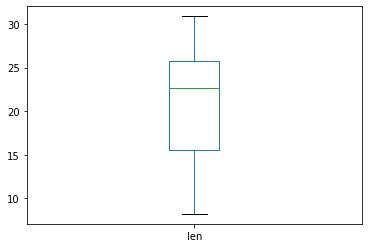

In [95]:
# Multiple Boxplots.
df['len'][df['supp']=='OJ'].plot.box()

<AxesSubplot:>

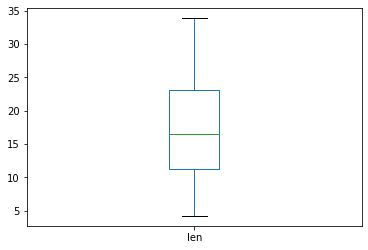

In [92]:
df['len'][df['supp']=='VC'].plot.box()

<AxesSubplot:>

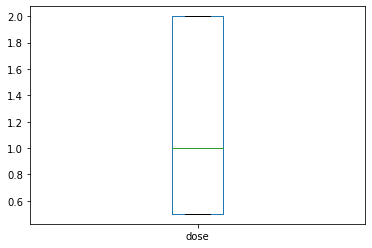

In [96]:
df['dose'][df['supp']=='OJ'].plot.box()


<AxesSubplot:>

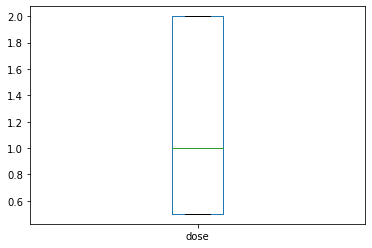

In [97]:
df['dose'][df['supp']=='VC'].plot.box()


In [100]:
#ANOVA.

print(st.f_oneway(df['len'][df['supp'] == 'OJ'],df['len'][df['supp'] == 'VC']))

F_onewayResult(statistic=3.668252541070971, pvalue=0.060393371224128745)


In [ ]:
# Result summary.
# we did ANOVA test to check if there's a difference between the mean of the teeth length when the supplementary type is OJ or VC
# after seing the results : the p_value > 0.05 (signicance level) there is no significant difference between the means of each group 

2). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'dose' variable. <br>
Summarize the result.

In [36]:
# Categories of 'dose'. 
df.dose.unique()

array([0.5, 1. , 2. ])

In [102]:
# Group by category.\
df.groupby(df['dose']).count()


,len,supp
dose,,
0.5,20,20
1.0,20,20
2.0,20,20


<AxesSubplot:>

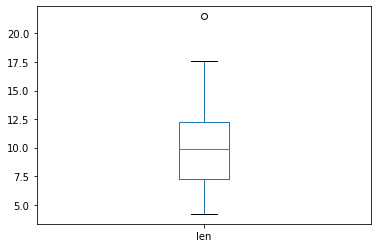

In [103]:
# Multiple Boxplots.
df['len'][df['dose']==0.5].plot.box()

<AxesSubplot:>

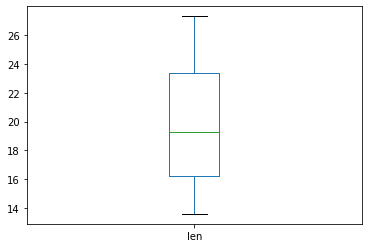

In [104]:
df['len'][df['dose']==1.0].plot.box()

<AxesSubplot:>

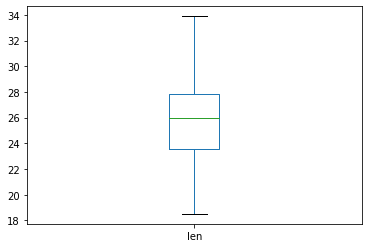

In [105]:
df['len'][df['dose']==2.0].plot.box()

In [67]:
# ANOVA.
st.f_oneway(df['len'][df['dose'] == 1.0],df['len'][df['dose'] == 2.0],df['len'][df['dose'] == 0.5])

F_onewayResult(statistic=67.4157378567425, pvalue=9.532727011699895e-16)

In [106]:
# Result summary.
#the null hypothesis is that : there is no significant difference between the mean of teeth length when 
#dosage per day = 0.5 , = 1.0 or =2.0 , and after seeing the results : the p_value is too low idicating that 
#there is significant difference between the means of each group (we can't reject the null hypothesis)